# Benutzung von Lobbyradar

Zu erst muss mal die Datei "Graph" und deren Funktionen importiert werden. Wichtig zu wissen ist das die libraries _pymongo_, _bson_, _rdflib_, _networkx_ und _matplotlib_ vorhanden sind.

In [1]:
import graph
from graph import search_persons, person_connections,  \
                  search_organizations, \
                  organization_connections, plot_triples, \
                  search_governmental, search_sparql
import dbpedia
from dbpedia import dbpedia_sparql_query, dbpedia_person
%matplotlib inline

Mit der Methode __search_persons__ kann mit freitext nach Personen gesucht werden.

In [2]:
search_persons(name="angela m", limit=10)

[u'Angela Merkel', u'Angela Marquardt']

Hat man den korrekten Namen der Person, kann mit Hilfe der Methode __person_connections__ nach "connections" also organisationen gesucht werden. Es wird eine Liste von Triples mit ('personenname', 'property', 'Organisationslabel') zurück gegeben.

In [3]:
angela_connections = person_connections("Angela Merkel")
angela_connections[:2]

[(u'Angela Merkel',
  u'http://example.org/isOtherwiseRelatedToGovernment',
  u'Bundeskanzleramt'),
 (u'Angela Merkel',
  u'http://example.org/isOtherMemberOf',
  u'Deutsches Museum')]

Die Methode __plot_triples__ visualisiert nun die triples in einem Graphen. Dabei werden die "Objekte" Grün und die "Subjekte" rot dargestellt. In unserem Fall sind die Personen grün und die Organisationen rot dargestellt.

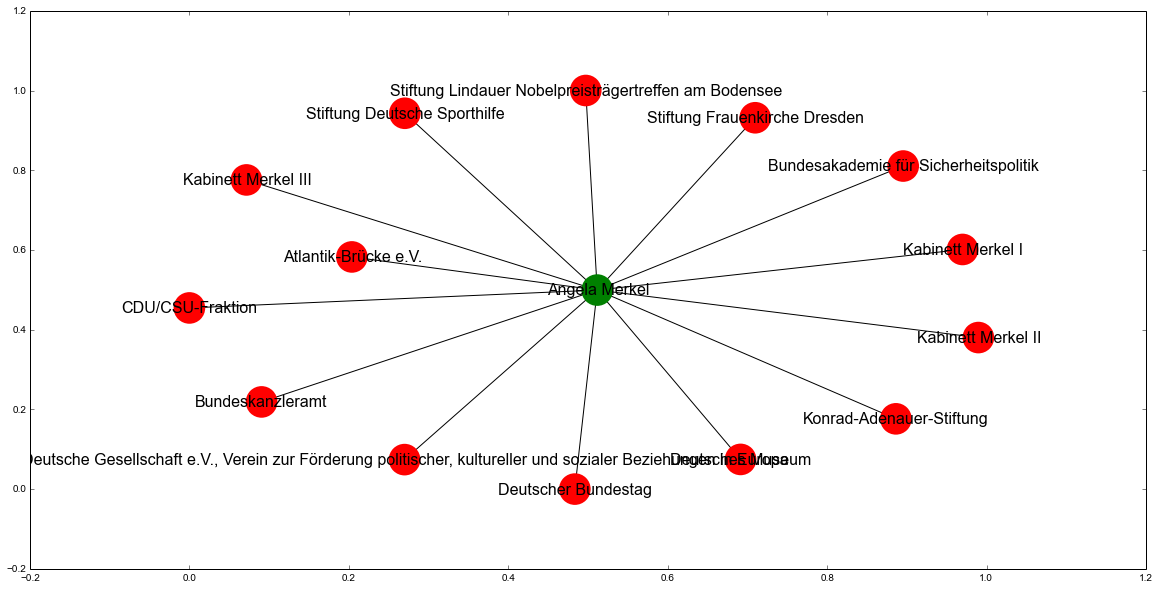

In [4]:
plot_triples(angela_connections)

Mit der Methode __search_organizations__ kann freitext nach Organisationen gesucht werden.

In [5]:
search_organizations("SPD")

[u'SPD-NRW', u'SPD', u'SPD-Bundestagsfraktion', u'SPD Vorpommern']

Nun kann mit der Methode __organization_connections__ nach Personen-Verbindungen dieser Organisation gesucht werden.
Zurück kommt wieder ein Triple. Analog zur Methode __person_connections__

In [6]:
org_conn_triple = organization_connections("SPD-Bundestagsfraktion")
org_conn_triple[:4]

[(u'Michael Gerdes',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion'),
 (u'Thomas Oppermann',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion'),
 (u'S\xf6nke Rix',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion'),
 (u'Martin Burkert',
  u'http://example.org/isOtherMemberOf',
  u'SPD-Bundestagsfraktion')]

Diese können dann wieder mit der Methode __plot_triples__ geplotted werden. Wenn der Graphen zu gross wird, kann die grösse des plotts selbst über figsize angegeben werden.

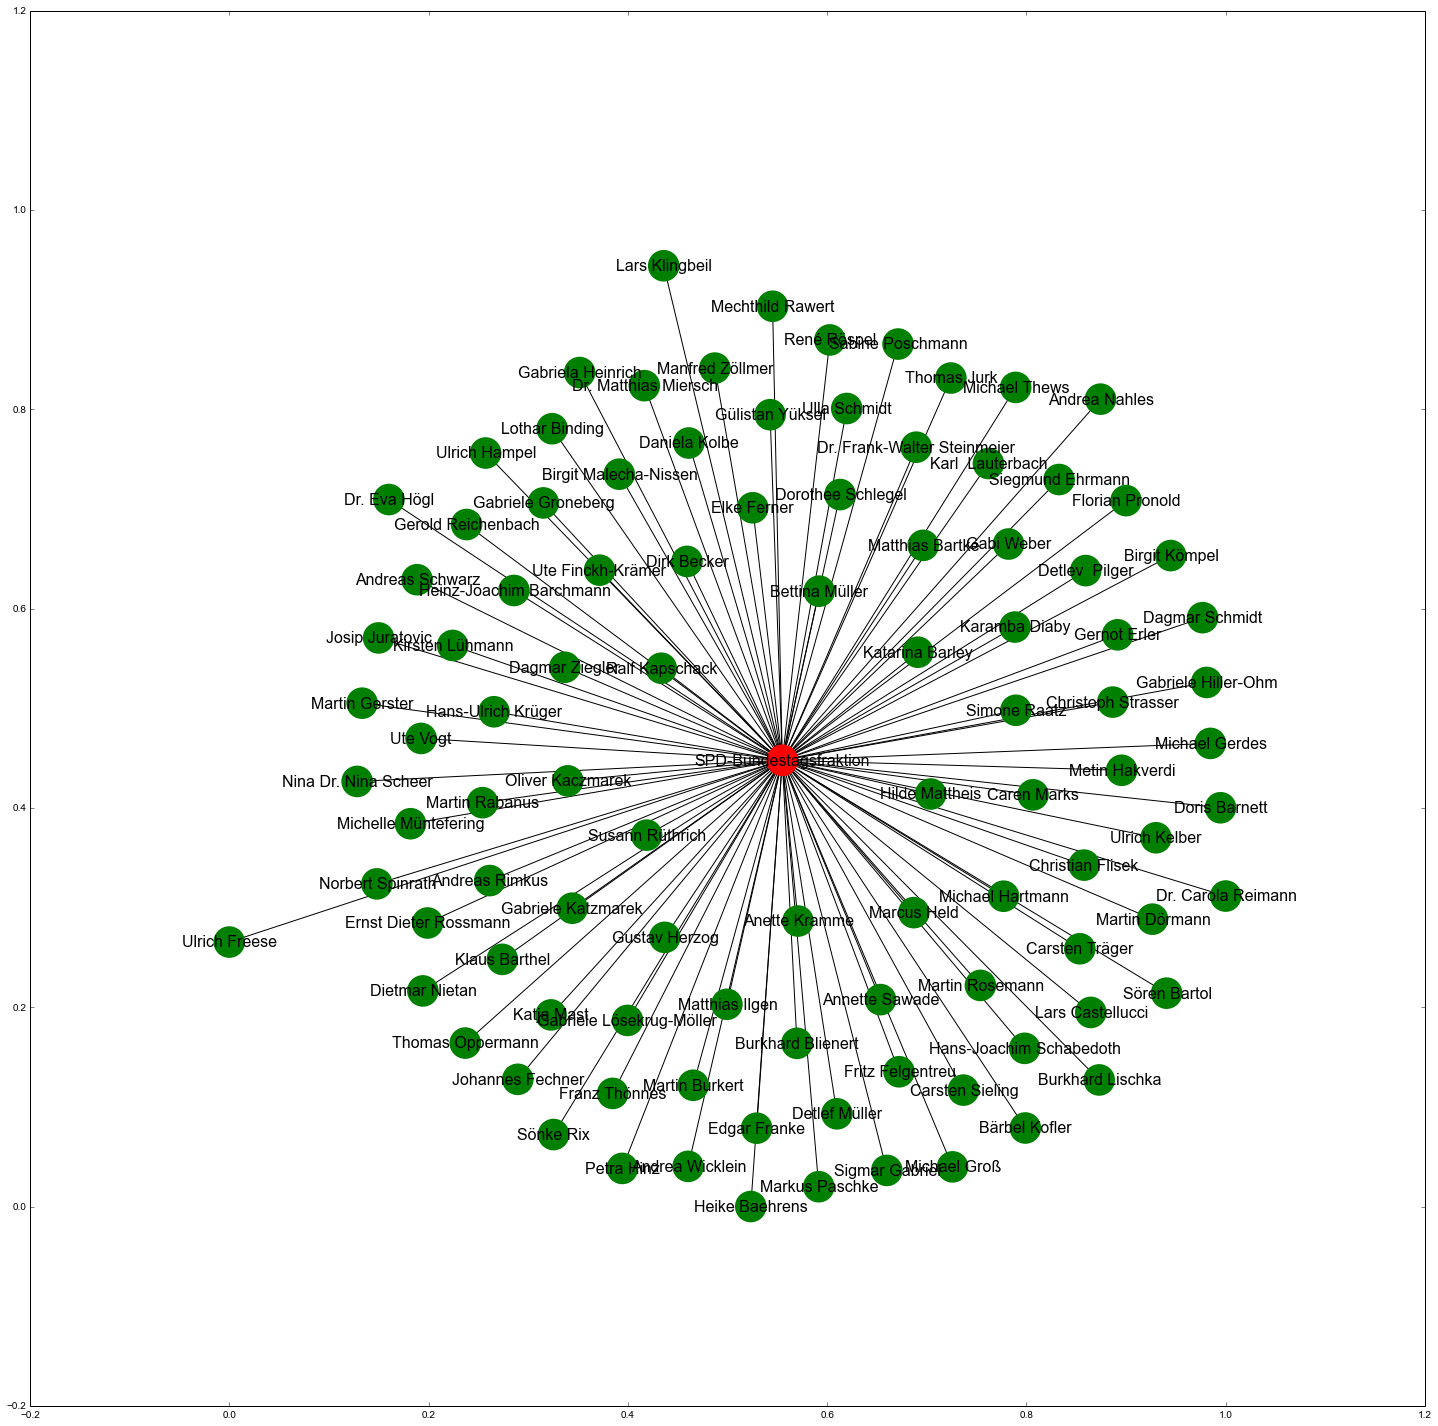

In [7]:
plot_triples(org_conn_triple, figsize=(25,25))

Mit der Methode __search_govenrmental__ kann ausschliesslich nach Bundesorganisationen gesucht werden.

In [8]:
gov_organizations = search_governmental()
gov_organizations[:10]

[u'Ministerium f\xfcr l\xe4ndliche Entwicklung, Umwelt und Landwirtschaft Brandenburg',
 u'Ministerium des Inneren Sachsen-Anhalt',
 u'Ministerium f\xfcr Arbeit, Soziales, Gesundheit, Frauen und Familie Th\xfcringen',
 u'Die Bundesbeauftragte f\xfcr den Datenschutz und die Informationsfreiheit',
 u'Bayrisches Staatsministerium f\xfcr Ern\xe4hrung, Landwirtschaft und Forsten',
 u'Justizministerium Baden-W\xfcrttemberg',
 u'Ministerium f\xfcr Arbeit, Soziales, Gesundheit, Frauen und Familie Brandenburg',
 u'Ministerium f\xfcr Klimaschutz, Umwelt, Landwirtschaft, Natur- und Verbraucherschutz Nordrhein-Westfalen',
 u'Bayrisches Staatsministerium f\xfcr Gesundheit und Pflege',
 u'Ministerium f\xfcr Inneres und Kommunales Th\xfcringen']

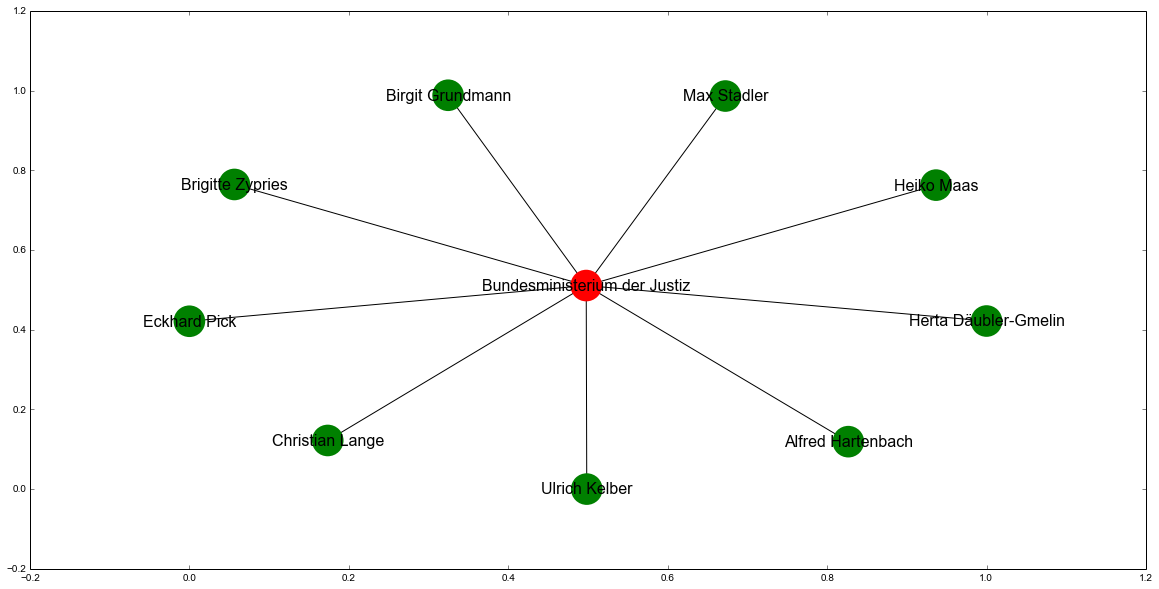

In [9]:
plot_triples(organization_connections("Bundesministerium der Justiz"))

Mit der Methode __search_sparql__ kann ein eigenes Sparql querie abgeschickt werden. zurück erhält man ein rdflib query resultat. Dieses kann dann selbst nach belieben verwendet werden.

Z.B. Kann die Ontologie analysiert werden.

In [10]:
res = search_sparql(""" 
    SELECT DISTINCT ?property ?subproperty
    WHERE {
        ?subproperty rdfs:isSubPropertyOf ?property .
    }
    LIMIT 100
""")

for row in res:
    print("%s -> %s" % row)

http://example.org/isMemberOf -> http://example.org/isAllianceMemberOf
http://example.org/isExecutiveOf -> http://example.org/isOtherExecutiveOf
http://example.org/isExecutiveOf -> http://example.org/isChairmanOfManagementOf
http://example.org/isMemberOf -> http://example.org/isRelatedToGovernment
http://example.org/isExecutiveOf -> http://example.org/isPresidentalBoardMemberOf
http://example.org/isExecutiveOf -> http://example.org/isDirectorsBoardMemberOf
http://example.org/isRelatedToGovernment -> http://example.org/isOtherwiseRelatedToGovernment
http://example.org/isRelatedToGovernment -> http://example.org/isHeadOfStateChancelleryOf
http://example.org/isExecutiveOf -> http://example.org/isAdvisoryBoardMemberOf
http://example.org/isMemberOf -> http://example.org/isChairmanOf
http://example.org/isExecutiveOf -> http://example.org/isVicePresidentOf
http://example.org/isRelatedToGovernment -> http://example.org/isPrivyCouncilorOf
http://example.org/isExecutiveOf -> http://example.org/i

In [11]:
res = dbpedia_person("Angela Merkel")

In [12]:
res

[(u'http://dbpedia.org/resource/Angela_Merkel',
  u'Angela Dorothea Merkel (* 17. Juli 1954 in Hamburg als Angela Dorothea Kasner) ist eine deutsche Politikerin. Bei der Bundestagswahl am 2. Dezember 1990 errang Merkel, die in der DDR als  Physikerin ausgebildet wurde und auch t\xe4tig war, erstmals ein Bundestagsmandat; in allen darauffolgenden sechs Bundestagswahlen wurde sie in ihrem Wahlkreis direkt gew\xe4hlt.Von 1991 bis 1994 war Merkel Bundesministerin f\xfcr Frauen und Jugend im Kabinett Kohl IV und von 1994 bis 1998 Bundesministerin f\xfcr Umwelt, Naturschutz und Reaktorsicherheit im Kabinett Kohl V. Von 1998 bis 2000 amtierte sie als Generalsekret\xe4rin der CDU.Seit dem 10. April 2000 ist sie Bundesvorsitzende der CDU und seit dem 22. November 2005 \u2013 mittlerweile in der dritten Amtsperiode \u2013 als Chefin von unterschiedlich zusammengesetzten Koalitionsregierungen deutsche Bundeskanzlerin. Sie ist die erste Frau und zugleich die achte Person in der Geschichte der Bund

In [13]:
dbpedia_sparql_query("""
SELECT ?person ?birthDate
WHERE {
    ?person a dbpedia-owl:Person .
    ?person foaf:name ?name .
    ?person dbpedia-owl:birthDate ?birthDate .
    ?person dbpedia-owl:birthPlace ?birthPlace .
    FILTER(str(?person) = 'http://dbpedia.org/resource/Angela_Merkel')
}""")

'\n{ "head": { "link": [], "vars": ["person", "birthDate"] },\n  "results": { "distinct": false, "ordered": true, "bindings": [\n    { "person": { "type": "uri", "value": "http://dbpedia.org/resource/Angela_Merkel" }\t, "birthDate": { "type": "typed-literal", "datatype": "http://www.w3.org/2001/XMLSchema#date", "value": "1954-07-17" }},\n    { "person": { "type": "uri", "value": "http://dbpedia.org/resource/Angela_Merkel" }\t, "birthDate": { "type": "typed-literal", "datatype": "http://www.w3.org/2001/XMLSchema#date", "value": "1954-07-17" }},\n    { "person": { "type": "uri", "value": "http://dbpedia.org/resource/Angela_Merkel" }\t, "birthDate": { "type": "typed-literal", "datatype": "http://www.w3.org/2001/XMLSchema#date", "value": "1954-07-17" }},\n    { "person": { "type": "uri", "value": "http://dbpedia.org/resource/Angela_Merkel" }\t, "birthDate": { "type": "typed-literal", "datatype": "http://www.w3.org/2001/XMLSchema#date", "value": "1954-07-17" }} ] } }'